In [330]:
%matplotlib inline
import os

import scipy
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

## Загрузка данных

In [331]:
paths = glob.glob(f"build/*results*.csv")

In [368]:
data_raw = pd.DataFrame()

for path in paths:
    item = pd.read_csv(path, skiprows=12, names=['name', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'E'])
    data_raw = pd.concat((data_raw, item), ignore_index=True)

## Первичная статистика ускорителя

In [369]:
data = data_raw
data_raw

,name,x,y,z,vx,vy,vz,E
0,gamma,8.62687,18.7803,42.0,0.41231,0.63044,1.54586,1.71963
1,gamma,-2.03114,-17.4397,42.0,-0.073924,-0.555033,1.37733,1.33898
2,e-,-2.291,-19.3907,46.8415,0.350289,-0.13986,0.175045,0.139984
3,gamma,-8.38571,-17.9946,42.0,-0.37091,-0.762739,1.81036,1.99918
4,gamma,-18.9994,-3.01534,42.0,-0.779771,-0.09588,1.97419,2.12478
...,...,...,...,...,...,...,...,...
55709,gamma,14.0789,18.369,42.0,0.340252,0.552483,1.16344,1.298
55710,e-,14.1429,18.4729,42.2188,0.001106,0.018642,0.012501,0.000472
55711,e-,14.1429,18.4729,42.2188,-0.120193,0.132953,0.057874,0.031939
55712,gamma,3.55719,17.0166,42.0,0.02247,0.041182,0.115992,0.12512


In [370]:
l = len(data_raw)
res = []
for name in set(data_raw['name']):
    count = len(data_raw[data_raw['name'] == name])
    res.append((name, count, count/l*100))
    
pd.DataFrame(res, columns=['name', 'count', 'percent'])

,name,count,percent
0,O16,546,0.980005
1,e+,262,0.470259
2,nu_e,713,1.279750
3,anti_nu_e,795,1.426930
4,neutron,2004,3.596942
5,proton,1378,2.473346
6,gamma,34453,61.839035
7,e-,15563,27.933733


## Распределение по координатам

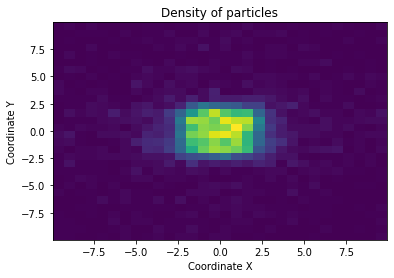

In [371]:
center = data[(-10 < data['x']) & (data['x'] < 10) & (-10 < data['y']) & (data['y'] < 10)]
plt.hist2d(center['x'], center['y'], bins=30)
plt.title('Density of particles')
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')
plt.show()

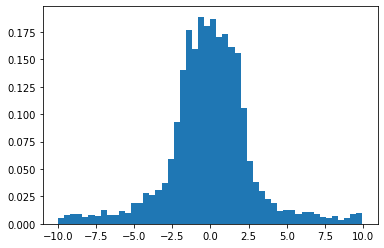

In [372]:
y_bins, x_bins, fff = plt.hist(cnt_x, 50, density=True)

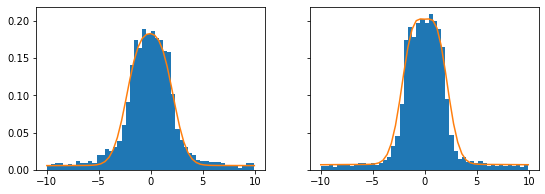

In [380]:
cnt_x = np.array(center['x'], dtype=float)
cnt_y = np.array(center['y'], dtype=float)

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)

_, bins, _ = axs[0].hist(cnt_x, 50, density=True)
mu, sigma = scipy.stats.norm.fit(cnt_x)
best_fit_line1 = scipy.stats.norm.pdf(bins, mu+1.13, sigma*0.45)
best_fit_line2 = scipy.stats.norm.pdf(bins, mu-1.13, sigma*0.45)
best_fit_line3 = scipy.stats.norm.pdf(bins, mu, sigma*10)
axs[0].plot(bins, (best_fit_line1+best_fit_line2+best_fit_line3)/2.4)

_, bins, _ = axs[1].hist(cnt_y, 50, density=True)
mu, sigma = scipy.stats.norm.fit(cnt_y)
best_fit_line1 = scipy.stats.norm.pdf(bins, mu+1.13, sigma*0.45)
best_fit_line2 = scipy.stats.norm.pdf(bins, mu-1.13, sigma*0.45)
best_fit_line3 = scipy.stats.norm.pdf(bins, mu, sigma*10)
axs[1].plot(bins, (best_fit_line1+best_fit_line2+best_fit_line3)/2.2)

plt.show()

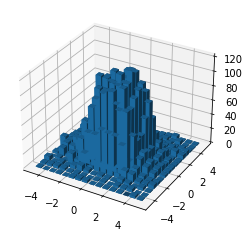

In [375]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = center['x'], center['y']
hist, xedges, yedges = np.histogram2d(x, y, bins=16, range=[[-5, 5], [-5, 5]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()